In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 4)

#import scikit-learn libraries
from sklearn.impute import SimpleImputer, KNNImputer

In [16]:
df = pd.read_excel("mobilesales.xlsx", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 217 entries, 2001-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   198 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


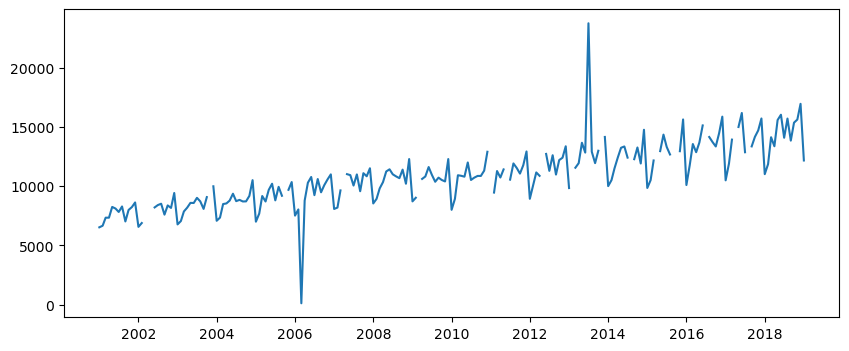

In [17]:
plt.plot(df["Sales"])
plt.show()

We can see that the data starts form "2001-01-01" to "2019-01-01"

We can see there are 19 missing values in the data. We need to impute the Data for the missing values

We can use the following techniques:
- mean/Median Imputation
- KNN Imputation
- fillNa function
- linear Imputation

# Data Imputation

## Mean/Median Imputation

In [52]:
# Plot Both graphs

def plotImputatedGraphs(before, after):
    plt.plot(after["Sales"], label="Imputed")
    plt.plot(before["Sales"], label="Original")
    plt.axhline(y=before["Sales"].mean(), linestyle=":", color="green")
    plt.legend()
    plt.show()

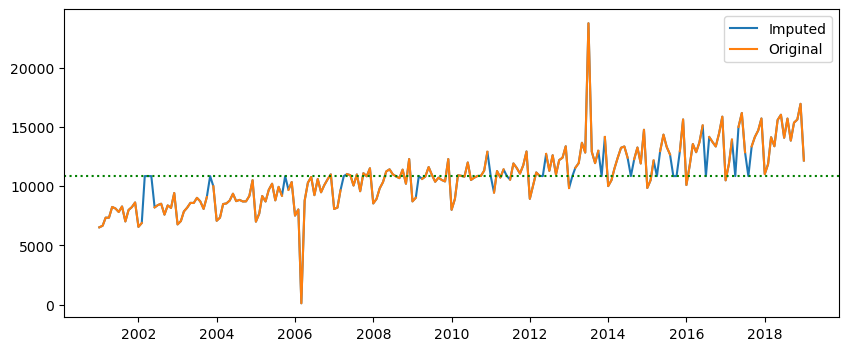

In [53]:
# Mean/Median Imputation
df_mean = df.copy()
df_mean = df_mean.fillna(value=df_mean["Sales"].mean())
plotImputatedGraphs(before=df, after=df_mean)

Not the best way to impute the data. 

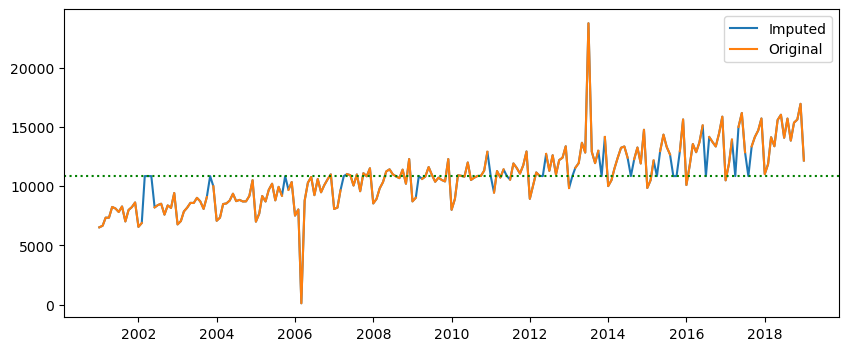

In [54]:
# same as Mean imputation but using Scikit learn

df_SI = df.copy()
simpImp = SimpleImputer(strategy="mean")
df_SI = pd.DataFrame(simpImp.fit_transform(df_SI), columns=simpImp.get_feature_names_out(), index=df_SI.index)
plotImputatedGraphs(before=df, after=df_SI)

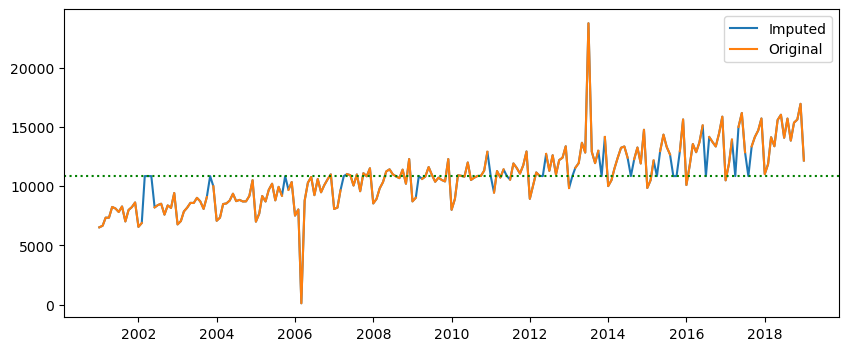

In [55]:
# KNN Imputation
knnImp = KNNImputer(n_neighbors=5)
df_KNN = pd.DataFrame(knnImp.fit_transform(df), columns=knnImp.get_feature_names_out(), index=df.index)
plotImputatedGraphs(before=df, after=df_KNN)

The filling looks exactly same as mean imputation

In [56]:
# forward Fill and Back Fill

/tmp/ipykernel_49189/1175682743.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ff["Sales"] = df["Sales"].fillna(method="ffill")


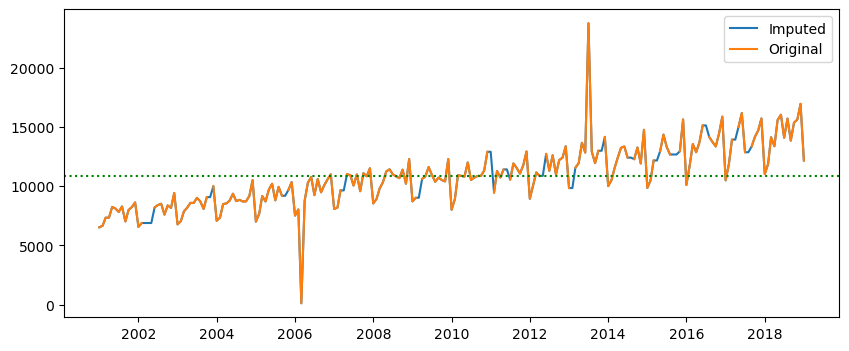

In [57]:
df_ff["Sales"] = df["Sales"].fillna(method="ffill")
plotImputatedGraphs(before=df, after=df_ff)

Forward and backwords fill are soo much better than the mean/Median/KNN imputation

In [58]:
# linear imputation

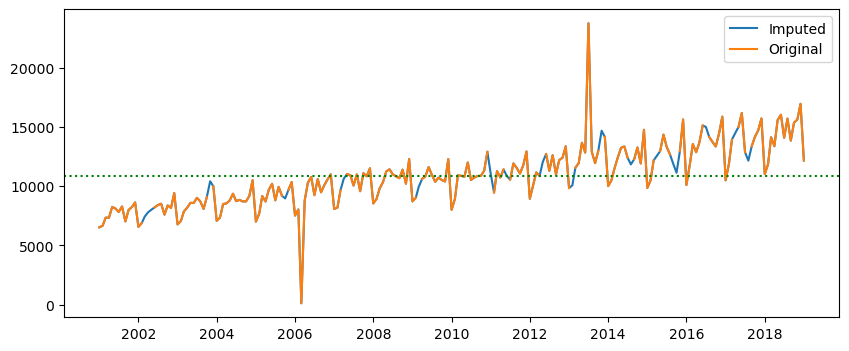

In [59]:
df_linInt["Sales"] = df["Sales"].interpolate(method="quadratic")
plotImputatedGraphs(before=df, after=df_linInt)

This imputation method is a lot better than the other imputation methods.

In [61]:
df["Sales"] = df["Sales"].interpolate(method="quadratic")

# Anamolies in the Data

We can see there are 2 anamolies in the data. We don't want our data to give wrong precitions because of the anamolies in the data.

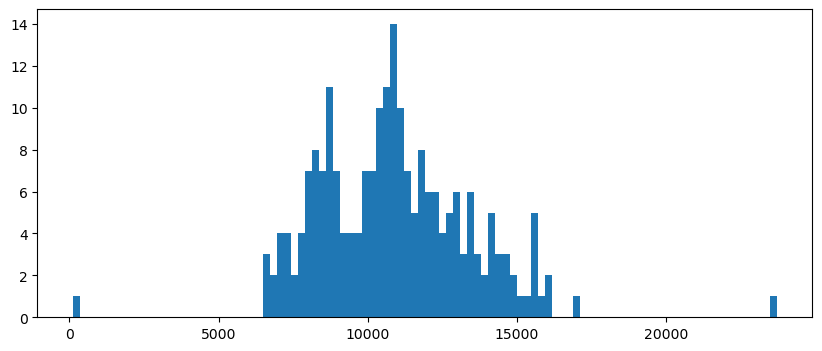

In [64]:
# cleaning anamolies in the data.

# We can clearly see 2 outliers in the Data
# We need to clip the data and later analize the reason for anamolies.
plt.hist(x=df["Sales"], bins=100)
plt.show()

In [66]:
df["Sales"].clip(lower=df["Sales"].quantile(0.05),
                 upper=df["Sales"].quantile(0.975), inplace=True)

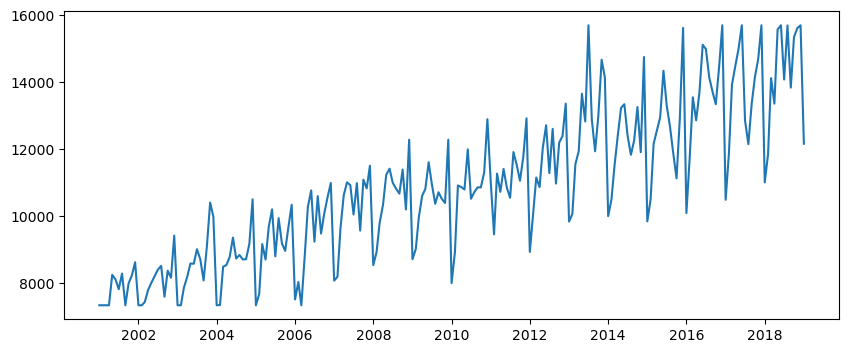

In [68]:
plt.plot(df["Sales"])